Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


# coca cola prices forecasting

RMSE for Linear Regression Model: 221.6831941845227


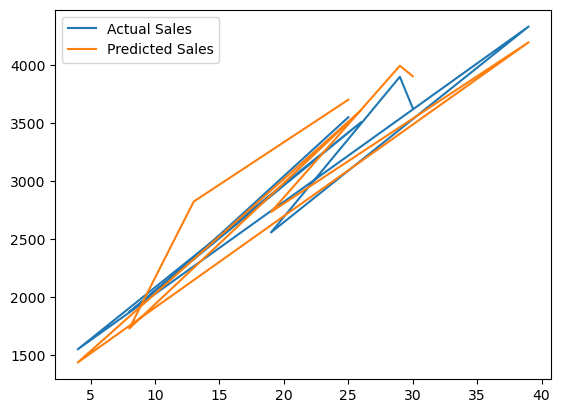

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


coca_cola_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')


coca_cola_data['Year'] = coca_cola_data['Quarter'].apply(lambda x: int(x.split('_')[1]))
coca_cola_data['Quarter'] = coca_cola_data['Quarter'].apply(lambda x: x.split('_')[0])

#creating dummy variables
coca_cola_data = pd.get_dummies(coca_cola_data, columns=['Quarter'], drop_first=True)


X = coca_cola_data.drop(['Sales'], axis=1)
y = coca_cola_data['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)


predictions = linear_model.predict(X_test)

# to calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'RMSE for Linear Regression Model: {rmse}')

# Visualizing predictions vs actual values
plt.plot(y_test.index, y_test.values, label='Actual Sales')
plt.plot(y_test.index, predictions, label='Predicted Sales')
plt.legend()
plt.show()


# airlines passenger forecasting

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE for ARIMA Model: 53.432645637867175


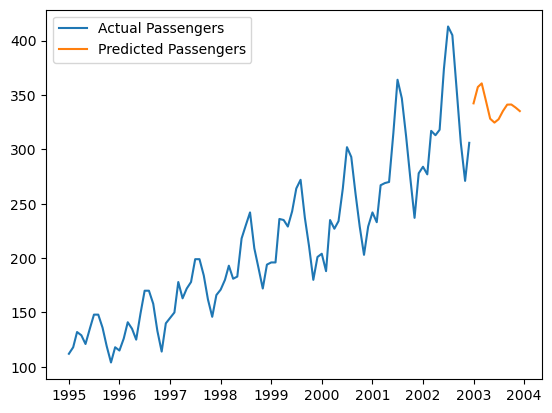

In [5]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


airlines_data = pd.read_excel('Airlines+Data.xlsx')


airlines_data['Month'] = pd.to_datetime(airlines_data['Month'])


airlines_data.set_index('Month', inplace=True)

# Initializing the ARIMA model
arima_model = ARIMA(airlines_data['Passengers'], order=(5,1,0))  # Adjust order as needed


arima_result = arima_model.fit()

predictions = arima_result.predict(start=len(airlines_data), end=len(airlines_data) + 11, typ='levels')

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(airlines_data['Passengers'].iloc[-12:], predictions))

print(f'RMSE for ARIMA Model: {rmse}')

# Visualizing predictions vs actual values
plt.plot(airlines_data.index, airlines_data['Passengers'], label='Actual Passengers')
plt.plot(predictions.index, predictions, label='Predicted Passengers')
plt.legend()
plt.show()


Linear Regression Model (Coca cola)
Three dummy variables were created for quarters.
RMSE: 221.6831941845227
ARIMA Model (Airlines Passengers Data)
No dummy variables were applicable
RMSE: 53.432645637867175
Based on the RMSE values, the ARIMA model performs better for forecasting on the Airlines passengers data with a lower RMSE value.
For Airlines passenger data, ARIMA model provides better forecasts
For CocaCola sales data, more models need to be tested.


